# 0.0. Import Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import gridspec
from matplotlib import pyplot as plt
import plotly.express as px

# 0.1. Helper functions

In [41]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 1. Dataset

## 1.1. Loading Dataset

In [42]:
df = pd.read_csv('datasets/kc_house_data.csv')

## 1.2. Data shape

In [43]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 21613
Number of columns: 21


## 1.3. Data types

In [44]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.4. Transforming data types

In [45]:
df['date'] = pd.to_datetime(df['date'])

## 1.5. Data Cleaning

In [46]:
#Droping unnecessary attributes
df = df.drop(['sqft_living15', 'sqft_lot15'], axis=1)

In [47]:
#Deleting duplicates
df.sort_values('id').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
2497,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,3,7,2400,0,1991,0,98002,47.33,-122.21
2496,1000102,2014-09-16,280000.00,6,3.00,2400,9373,2.00,0,0,3,7,2400,0,1991,0,98002,47.33,-122.21
6735,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,4,8,1160,900,1947,0,98166,47.44,-122.35
8411,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,3,7,1460,0,1952,0,98166,47.44,-122.35
8809,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,4,6,1010,420,1930,0,98168,47.48,-122.27


In [48]:
df = df.drop_duplicates(subset = ['id'], keep = 'last')

In [49]:
df.sort_values('id').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
2497,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,3,7,2400,0,1991,0,98002,47.33,-122.21
6735,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,4,8,1160,900,1947,0,98166,47.44,-122.35
8411,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,3,7,1460,0,1952,0,98166,47.44,-122.35
8809,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,4,6,1010,420,1930,0,98168,47.48,-122.27
3557,3600057,2015-03-19,402500.00,4,2.00,1650,3504,1.00,0,0,3,7,760,890,1951,2013,98144,47.58,-122.29


## 1.6. Creating new attributes

In [50]:
df['age_build'] = df['yr_built'].apply(lambda x: 'build <1955' if x < 1955 else 'build > 1955')

df['basement'] = df['sqft_basement'].apply(lambda x: 'basement' if x > 0 else 'no_basement')

df['renovation'] = df['yr_renovated'].apply(lambda x: 'renovation' if x > 0 else 'no_renovation')

df['condition_type'] = df['condition'].apply(lambda x: 'bad' if x <=2 else
                                                       'regular' if x == 3 or x == 4 else
                                                       'good') 

df['year']= df['date'].dt.year

df['month'] = df['date'].dt.month

df['season'] = df['month'].apply(lambda x: 'summer' if (x > 6) & (x <= 9) else
                                           'spring' if (x > 3) & (x <= 6) else
                                           'fall' if (x > 9) & (x <= 12) else
                                           'winter')

In [51]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,age_build,basement,renovation,condition_type,year,month,season
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,98178,47.51,-122.26,build > 1955,no_basement,no_renovation,regular,2014,10,fall
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,98125,47.72,-122.32,build <1955,basement,renovation,regular,2014,12,fall
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,98028,47.74,-122.23,build <1955,no_basement,no_renovation,regular,2015,2,winter
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,98136,47.52,-122.39,build > 1955,basement,no_renovation,good,2014,12,fall
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,98074,47.62,-122.05,build > 1955,no_basement,no_renovation,regular,2015,2,winter


## 1.7. Descriptive statistics

In [52]:
df = df.copy()

In [53]:
#Including only numeric attributes
num_attributes = df.select_dtypes(include=['int64', 'float64'])

#Dropping column 'id'
num_attributes = num_attributes.iloc[:, 1:]

In [54]:
# Estimates of location
avg = pd.DataFrame(num_attributes.apply(np.mean))
median = pd.DataFrame(num_attributes.apply(np.median))

# Estimates of variability
std = pd.DataFrame(num_attributes.apply(np.std))
max_ = pd.DataFrame(num_attributes.apply(np.max))
min_ = pd.DataFrame(num_attributes.apply(np.min))

# Concat
d_st = pd.concat([avg, median, std, min_, max_], axis=1).reset_index()

# Changing column names
d_st.columns = ['attributes', 'average', 'median', 'std', 'min', 'max']

d_st.head(20)

,attributes,average,median,std,min,max
0,price,541649.96,450000.00,367306.36,75000.00,7700000.00
1,bedrooms,3.37,3.00,0.93,0.00,33.00
2,bathrooms,2.12,2.25,0.77,0.00,8.00
3,sqft_living,2082.70,1920.00,919.13,290.00,13540.00
4,sqft_lot,15135.64,7614.00,41537.65,520.00,1651359.00
5,floors,1.50,1.50,0.54,1.00,3.50
6,waterfront,0.01,0.00,0.09,0.00,1.00
7,view,0.24,0.00,0.77,0.00,4.00
8,condition,3.41,3.00,0.65,1.00,5.00
9,grade,7.66,7.00,1.17,1.00,13.00


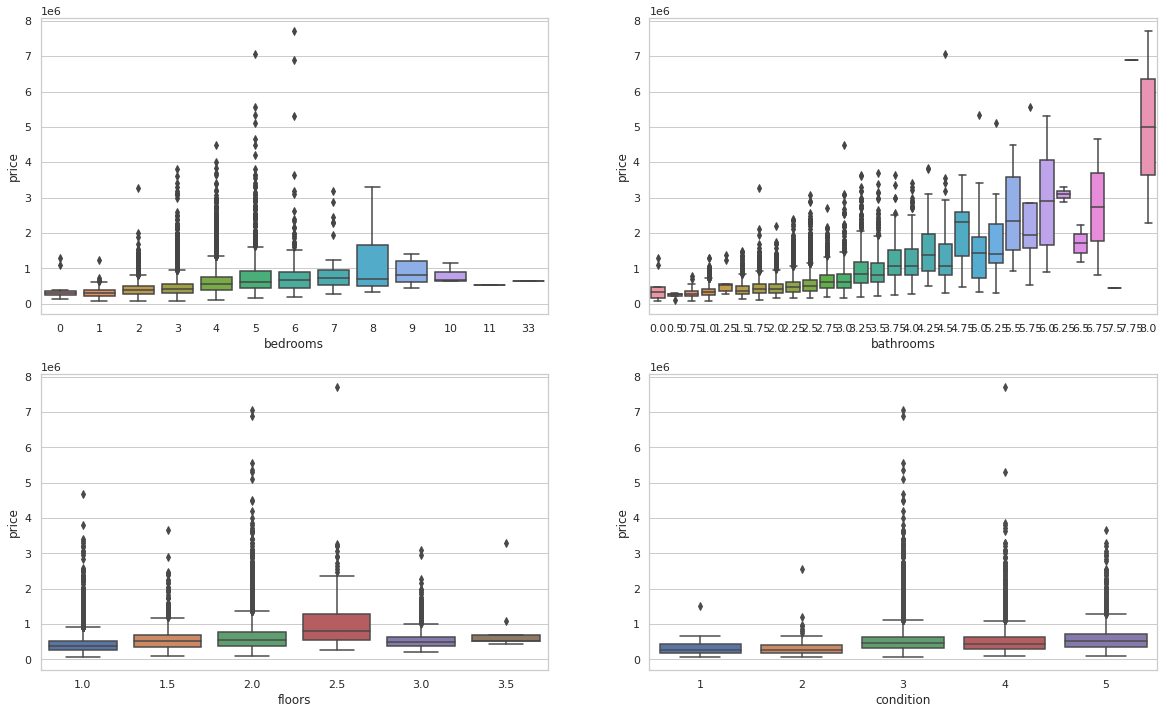

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
specs = gridspec.GridSpec( ncols= 2, nrows=2, figure=fig)
sns.set_theme(style="whitegrid")

# First graph
fig1 = sns.boxplot(x="bedrooms", y="price", data=df, ax = axes[0, 0])

# Second graph
fig2 = sns.boxplot(x="bathrooms", y="price", data=df, ax = axes[0, 1])

# Third graph
fig3 = sns.boxplot(x="floors", y="price", data=df, ax = axes[1, 0])

#Fourth graph
fig4 = sns.boxplot(x="condition", y="price", data=df, ax = axes[1, 1])


# 2. Data Exploration

## 2.1. Correlation

In [56]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,year,month
id,1.00,-0.02,0.00,0.00,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,0.01,-0.01
price,-0.02,1.00,0.31,0.52,0.70,0.09,0.25,0.27,0.40,0.03,0.67,0.60,0.32,0.05,0.13,-0.05,0.31,0.02,0.00,-0.01
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,-0.01,-0.00
bathrooms,0.00,0.52,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.13,0.66,0.68,0.28,0.51,0.05,-0.20,0.02,0.22,-0.03,0.01
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.43,0.32,0.06,-0.20,0.05,0.24,-0.03,0.01
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.08,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.01,-0.00
floors,0.02,0.25,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.27,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.12,-0.02,0.02
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,-0.00,0.01
view,0.01,0.40,0.08,0.19,0.28,0.08,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.06,0.10,0.09,0.01,-0.08,0.00,-0.00
condition,-0.02,0.03,0.03,-0.13,-0.06,-0.01,-0.27,0.02,0.05,1.00,-0.15,-0.16,0.17,-0.36,-0.06,0.00,-0.02,-0.11,-0.05,0.02


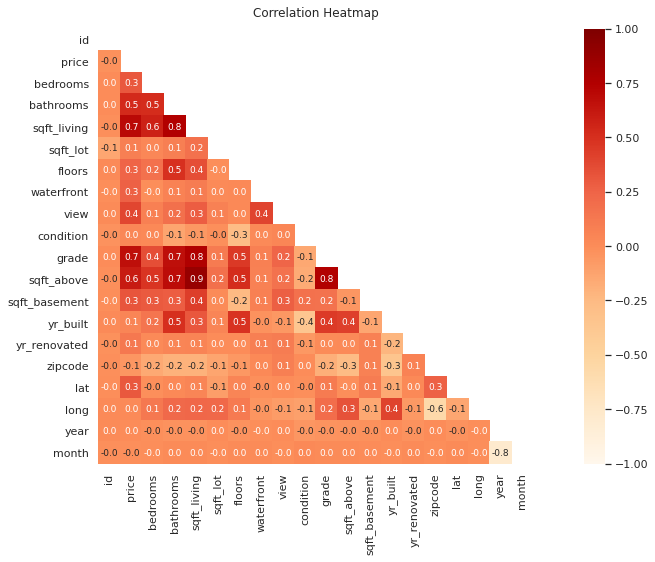

In [57]:
matrix = np.triu(df.corr())
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df.corr(),
            cmap='OrRd',
            vmin = -1,
            vmax=1,
            annot=True,
            fmt='.1f',
            annot_kws={
                'fontsize': 9
            },
            square=True, mask = matrix);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## 2.2. Data Insights

### **H01:** Properties that are waterfront are, in average, 30% more expensive.

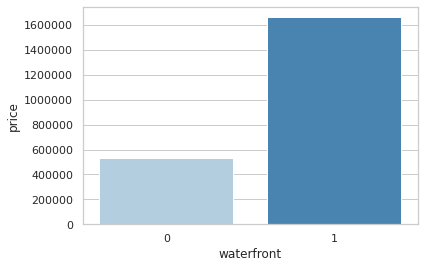

In [58]:
water_price = df[['price', 'waterfront']].groupby('waterfront').mean().reset_index()
sns.barplot(x="waterfront", y="price", data=water_price,  palette="Blues")
plt.ticklabel_format(style='plain', axis='y')

### **H02:** Properties built before 1955 are, in average, 50% less expensive.

<AxesSubplot:xlabel='age_build', ylabel='price'>

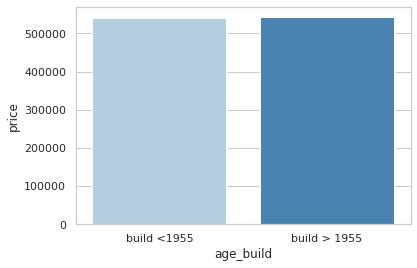

In [59]:
build_price = df[['price', 'age_build']].groupby('age_build').mean().reset_index()
sns.barplot(x="age_build", y="price", data=build_price,  palette="Blues")

### **H03:** Properties without basement have a sqrt_lot 50% bigger than the ones with basement.

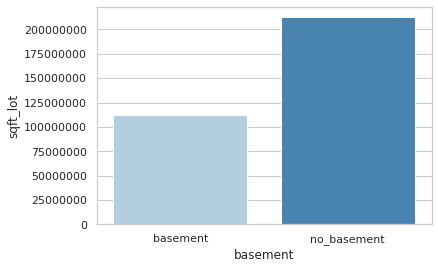

In [60]:
basement_lot = df[['sqft_lot', 'basement']].groupby('basement').sum().reset_index()
sns.barplot(x="basement", y="sqft_lot", data=basement_lot,  palette="Blues")
plt.ticklabel_format(style='plain', axis='y')

### **H04:** Properties with higher number of bedrooms are, in average, 10% more expensive.

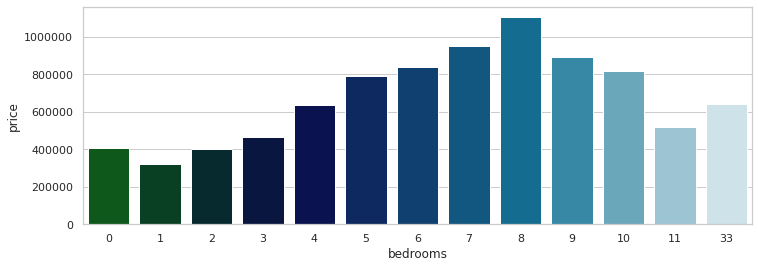

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
bedrooms_price = df[['price', 'bedrooms']].groupby('bedrooms').mean().reset_index()
sns.barplot(x="bedrooms", y="price", data=bedrooms_price,  palette="ocean")
plt.ticklabel_format(style='plain', axis='y')

### **H05:** Properties that were never renovated are, in average, 20% less expensive.

<AxesSubplot:xlabel='renovation', ylabel='price'>

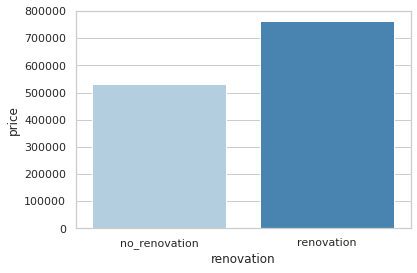

In [62]:
renovation_price = df[['price', 'renovation']].groupby('renovation').mean().reset_index()
sns.barplot(x="renovation", y="price", data=renovation_price,  palette="Blues")

### **H06:** Older properties that were never renovated are 40% less expensive.

<AxesSubplot:xlabel='renovation', ylabel='price'>

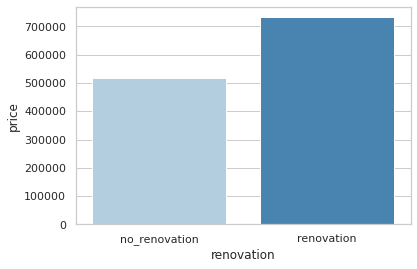

In [63]:
data = df[df['age_build'] == 'build <1955']
renovation_price = data[['price', 'renovation']].groupby('renovation').mean().reset_index()
sns.barplot(x="renovation", y="price", data=renovation_price,  palette="Blues")

### **H07:** Properties that were renovated recently are, in average, 10% more expensive.

<AxesSubplot:xlabel='age_renovation', ylabel='price'>

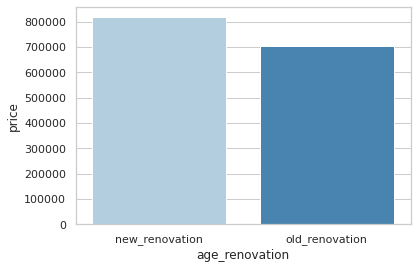

In [64]:
data = df[df['renovation'] == 'renovation']
data = data.copy()
data['age_renovation'] = data['yr_renovated'].apply(lambda x: 'new_renovation' if x >= 2000 else 'old_renovation')
new_renovation_price = data[['price', 'age_renovation']].groupby('age_renovation').mean().reset_index()
sns.barplot(x='age_renovation', y='price', data=new_renovation_price,  palette='Blues')

### **H08:** Properties in bad condition but that are waterfront are, in average, 10% more expensive.

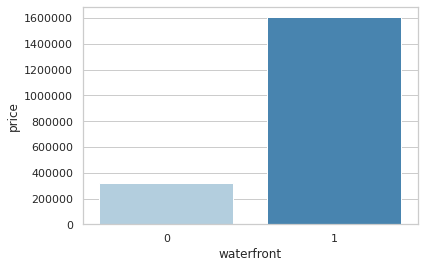

In [65]:
data = df[df['condition_type'] == 'bad']
bad_water_price = data[['price', 'waterfront']].groupby('waterfront').mean().reset_index()
sns.barplot(x="waterfront", y="price", data=bad_water_price,  palette="Blues")
plt.ticklabel_format(style='plain', axis='y')

### **H09:** The YoY (Year over Year) growth of the price of the properties is of 10%.

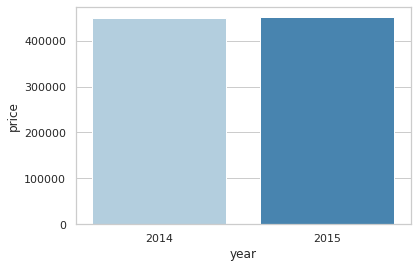

In [66]:
YoY = df[['year', 'price']].groupby('year').median().reset_index()
sns.barplot(x="year", y="price", data=YoY,  palette="Blues")
plt.ticklabel_format(style='plain', axis='y')

### **H10:** The MoM (Month over Month) growth of the price of the properties is 15%.

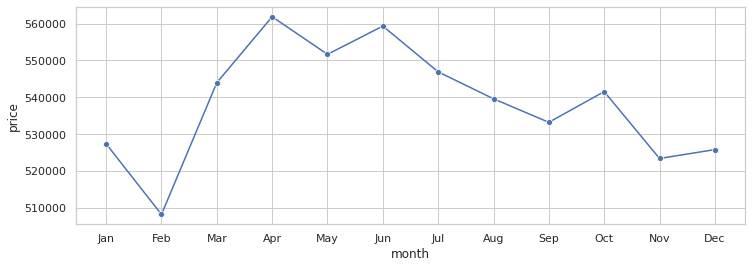

In [67]:
MoM = df[['price', 'year', 'month']].groupby('month').mean().reset_index()
MoM['month']=MoM['month'].apply(lambda x: 'Jan' if x == 1 else
                                          'Feb' if x == 2 else
                                          'Mar' if x == 3 else
                                          'Apr' if x == 4 else
                                          'May' if x == 5 else
                                          'Jun' if x == 6 else
                                          'Jul' if x == 7 else
                                          'Aug' if x == 8 else
                                          'Sep' if x == 9 else
                                          'Oct' if x == 10 else
                                          'Nov' if x == 11 else 'Dec')
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.lineplot(data=MoM, x='month', y='price', ax=ax, palette='Blues',  markers=True, style = (1), legend = False)
plt.ticklabel_format(style='plain', axis='y')

# 3.0. Business challenges

## 3.1. Which properties should House Rocket buy, and at what price?

In [68]:
df = df.copy()

In [69]:
# Filter dataset
data = df[['id', 'zipcode', 'price', 'condition', 'lat', 'long', 'season']]
data = data.copy()

In [70]:
# Determine median price by zipcode
zipcode_price = data[['zipcode', 'price']].groupby('zipcode').median().reset_index()

# Defining buying strategy
buy_strat = pd.merge(zipcode_price, data, on='zipcode', how='inner') # Join columns
buy_strat = buy_strat.rename(columns={'price_x': 'zipcode_median', 'price_y': 'property_price'}) # Rename columns
buy_strat = buy_strat.reindex(columns=['id', 'zipcode', 'lat', 'long', 'season', 
                                       'condition', 'zipcode_median', 'property_price']) # Order columns
buy_strat['buy'] = 'NA' # Create empty column

# Populate column buy
# Buy only properties in regular/good condition and with prices below the median price by zipcode
for i in range (len(buy_strat)):
    if (buy_strat.loc[i, 'zipcode_median']  >= buy_strat.loc[i, 'property_price']) & (buy_strat.loc[i, 'condition'] > 3): 
        buy_strat.loc[i, 'buy']  = 'yes'
    else:
        buy_strat.loc[i, 'buy']  = 'no'

In [71]:
# Report which properties to buy
prop_buy = buy_strat[buy_strat['buy'] == 'yes']

report_buy = prop_buy[['id', 'property_price', 'buy']]

report_buy.to_csv('datasets/report_buy.csv', index = False)
report_buy

,id,property_price,buy
6,9262800171,252000.00,yes
7,3353401710,227950.00,yes
10,7967200060,243000.00,yes
12,5066400483,249900.00,yes
17,3353400860,249900.00,yes
...,...,...,...
21400,871000065,419000.00,yes
21403,871000155,665000.00,yes
21406,7010701383,680000.00,yes
21408,6822100155,630000.00,yes


In [72]:
data_fig = buy_strat[['id', 'lat', 'long', 'property_price', 'condition', 'buy']]

fig = px.scatter_mapbox(data_fig,
                   lat = 'lat',
                   lon = 'long',
                   color = 'buy',
                   category_orders={'buy':list(buy_strat.condition.unique())},
                   color_discrete_sequence=['#cd2026', '#2e8540'],
                   size = 'property_price',
                   size_max=15,
                   zoom=8,
                   height=300)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=600, margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()

fig.write_html('datasets/map_house_rocket.html')

## 3.2. Once the property is aquired, what is the best moment to sell, and by which price?

In [73]:
buy_strat = buy_strat.copy()

In [74]:
#Filter bought properties
data = buy_strat[buy_strat['buy'] == 'yes']

# Determine median price by zipcode, by season
season_zip_price = data[['season', 'zipcode', 'property_price']].groupby(['zipcode', 'season']).median().reset_index()

# Rename columns
season_zip_price = season_zip_price.rename(columns={'season': 'season_median', 'property_price': 'season_prop_price'})

# Defining selling strategy
sell_strat = pd.merge(season_zip_price, data, on='zipcode', how='inner') # Join columns
sell_strat = sell_strat.reindex(columns=['id', 'zipcode', 'lat', 'long', 'season', 
                                         'condition', 'zipcode_median', 'season_median', 'season_prop_price',
                                         'property_price']) # Order columns

sell_strat['sell_price'] = 'NA' # Create empty column

# Populate column buy

for i in range (len(sell_strat)):
    
    #If the buying price of the property is higher than the median of the price by zipcode + season
    if (sell_strat.loc[i, 'property_price'] >= sell_strat.loc[i, 'season_prop_price']): 
        
        # The selling price will be the buying price +10%
        sell_strat.loc[i, 'sell_price']  = sell_strat.loc[i, 'property_price'] * 1.1
        
    #If the buying price of the property is lower than the median of the price zipcode + season
    else:
        
        # The selling price will be the buying price 30%
        sell_strat.loc[i, 'sell_price']  = sell_strat.loc[i, 'property_price'] * 1.3

In [75]:
# Report selling strategy
report_sell = sell_strat[['id', 'season', 'property_price', 'sell_price']]

report_sell.to_csv('datasets/report_sell.csv', index = False)
report_sell

,id,season,property_price,sell_price
0,9262800171,winter,252000.00,277200.00
1,3353401710,summer,227950.00,296335.00
2,7967200060,summer,243000.00,267300.00
3,5066400483,fall,249900.00,274890.00
4,3353400860,summer,249900.00,274890.00
...,...,...,...,...
15314,871000065,fall,419000.00,544700.00
15315,871000155,fall,665000.00,731500.00
15316,7010701383,fall,680000.00,748000.00
15317,6822100155,spring,630000.00,693000.00


# 4.0. Business solutions

## 4.1. Determine profit

In [76]:
sell_strat['profit'] = sell_strat['sell_price'] - sell_strat['property_price']
sell_strat

,id,zipcode,lat,long,season,condition,zipcode_median,season_median,season_prop_price,property_price,sell_price,profit
0,9262800171,98001,47.31,-122.27,winter,4,260000.00,fall,229500.00,252000.00,277200.00,25200.00
1,3353401710,98001,47.26,-122.25,summer,5,260000.00,fall,229500.00,227950.00,296335.00,68385.00
2,7967200060,98001,47.36,-122.28,summer,4,260000.00,fall,229500.00,243000.00,267300.00,24300.00
3,5066400483,98001,47.29,-122.28,fall,4,260000.00,fall,229500.00,249900.00,274890.00,24990.00
4,3353400860,98001,47.27,-122.25,summer,5,260000.00,fall,229500.00,249900.00,274890.00,24990.00
...,...,...,...,...,...,...,...,...,...,...,...,...
15314,871000065,98199,47.65,-122.40,fall,4,689900.00,winter,510000.00,419000.00,544700.00,125700.00
15315,871000155,98199,47.65,-122.40,fall,4,689900.00,winter,510000.00,665000.00,731500.00,66500.00
15316,7010701383,98199,47.66,-122.40,fall,5,689900.00,winter,510000.00,680000.00,748000.00,68000.00
15317,6822100155,98199,47.65,-122.40,spring,5,689900.00,winter,510000.00,630000.00,693000.00,63000.00


In [77]:
#Total profit of the portfolio

total_profit = sell_strat['profit'].sum()
print(f'The total profit (profit = buying price - selling price) of the properties in the portfolio is: ${total_profit:.2f}')

The total profit (profit = buying price - selling price) of the properties in the portfolio is: $1120904228.20
